In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
%run 0-Function-Helper.ipynb

# CLEANED DATASET

In [25]:
df_merged = pd.read_csv("../data/merged_datasetes_balanced_huge_cleaned.csv")

In [26]:
x_train, x_test, y_train, y_test = train_test_split(
    df_merged["title"], 
    df_merged["clickbait"],
    test_size=0.2, 
    random_state=42
)

x_test, x_val, y_test, y_val = train_test_split(
    x_test, 
    y_test,
    test_size=0.5,  # 50% of the original x_test size for validation
    random_state=42,
    stratify=y_test
)

In [27]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_val = vectorization.transform(x_val)

## RandomForest

In [28]:
#LEMATYZACja i usuwanie stop words'ow to jest scam :)
# 

0.804 & 0.818 & 0.781 & 0.799 & 0.882 \
{'Accuracy': 0.804, 'Precision': 0.8176563321071991, 'Recall': 0.7807325639739087, 'F1 Score': 0.7987679671457905, 'ROC-AUC': 0.8822391824299848}

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      2007
           1       0.82      0.78      0.80      1993

    accuracy                           0.80      4000
   macro avg       0.80      0.80      0.80      4000
weighted avg       0.80      0.80      0.80      4000



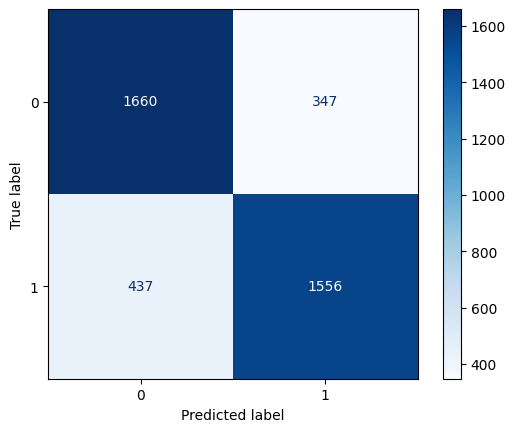

In [29]:
RF = RandomForestClassifier(random_state = 2)
RF.fit(xv_train, y_train)
pred_rf = RF.predict(xv_val)
pred_rf_prob = RF.predict_proba(xv_val)
create_summary_for_model_metrics(y_val, pred_rf, pred_rf_prob[:,1])

0.778 & 0.849 & 0.673 & 0.751 & 0.858 \
{'Accuracy': 0.7775, 'Precision': 0.8488298545224542, 'Recall': 0.6733567486201706, 'F1 Score': 0.7509792949076665, 'ROC-AUC': 0.8575680052080639}

              precision    recall  f1-score   support

           0       0.73      0.88      0.80      2007
           1       0.85      0.67      0.75      1993

    accuracy                           0.78      4000
   macro avg       0.79      0.78      0.77      4000
weighted avg       0.79      0.78      0.78      4000



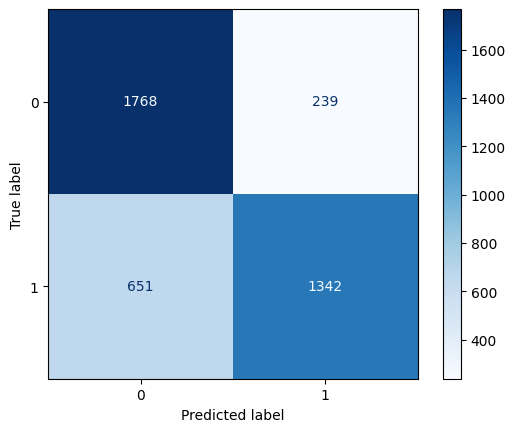

In [30]:
xgb_model = xgb.XGBClassifier(random_state = 2)
xgb_model.fit(xv_train, y_train)
pred_xgb = xgb_model.predict(xv_val)
pred_xgb_prob = xgb_model.predict_proba(xv_val)
create_summary_for_model_metrics(y_val, pred_xgb, pred_xgb_prob[:,1])

# RAW DATASET

In [31]:
df_merged = pd.read_csv("../data/merged_datasetes_balanced_huge.csv")

In [32]:
x_train, x_test, y_train, y_test = train_test_split(
    df_merged["title"], 
    df_merged["clickbait"],
    test_size=0.2, 
    random_state=42
)

x_test, x_val, y_test, y_val = train_test_split(
    x_test, 
    y_test,
    test_size=0.5,  # 50% of the original x_test size for validation
    random_state=42,
    stratify=y_test
)

In [33]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_val = vectorization.transform(x_val)

0.832 & 0.842 & 0.816 & 0.829 & 0.906 \
{'Accuracy': 0.832, 'Precision': 0.8416968442834971, 'Recall': 0.8163572503763171, 'F1 Score': 0.8288334182373918, 'ROC-AUC': 0.9059209725319135}

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      2007
           1       0.84      0.82      0.83      1993

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.83      0.83      0.83      4000



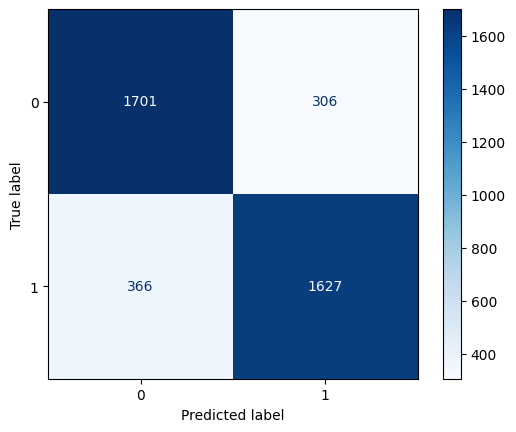

In [34]:
RF = RandomForestClassifier(random_state = 2)
RF.fit(xv_train, y_train)
pred_rf = RF.predict(xv_val)
pred_rf_prob = RF.predict_proba(xv_val)
create_summary_for_model_metrics(y_val, pred_rf, pred_rf_prob[:,1])

0.816 & 0.862 & 0.752 & 0.803 & 0.894 \
{'Accuracy': 0.8165, 'Precision': 0.8624064478986759, 'Recall': 0.7516307074761666, 'F1 Score': 0.8032171581769436, 'ROC-AUC': 0.8937349482531161}

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      2007
           1       0.86      0.75      0.80      1993

    accuracy                           0.82      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.82      0.82      0.82      4000



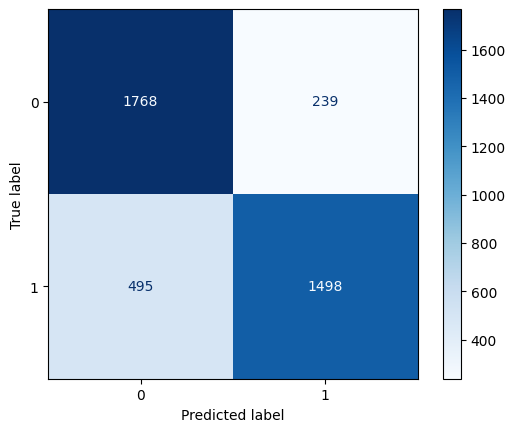

In [35]:
xgb_model = xgb.XGBClassifier(random_state = 0)
xgb_model.fit(xv_train, y_train)
pred_xgb = xgb_model.predict(xv_val)
pred_xgb_prob = xgb_model.predict_proba(xv_val)
create_summary_for_model_metrics(y_val, pred_xgb, pred_xgb_prob[:,1])